In [ ]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

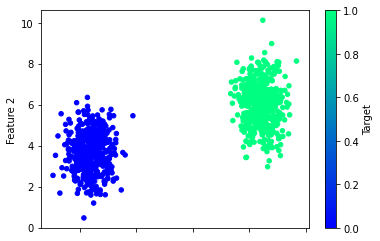

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.8426 - accuracy: 0.2240
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7846 - accuracy: 0.3213
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.4067
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4827
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.5640
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.6013
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.6427
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7347
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.8400
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.9200
Epoch 11/

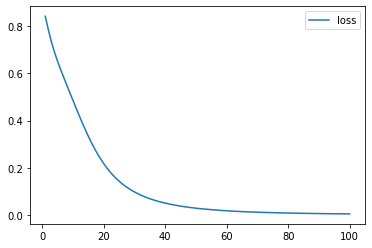

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

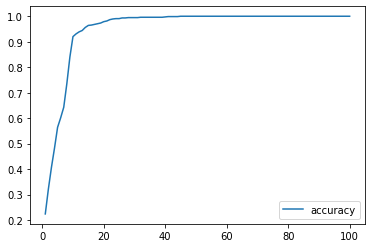

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0034 - accuracy: 1.0000
Loss: 0.003387406701222062, Accuracy: 1.0
